In [1]:
import pandas as pd

from datetime import datetime

import spotipy
from credentials import client_id, client_secret
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
df = pd.read_csv('spotify_track_info.csv')

In [6]:
df.head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_popularity,track_uri,added_on,danceability,energy,...,id,uri,track_href,analysis_url,duration_ms,time_signature,time_added,date_added,hour_added,day_added
0,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,6cd3jB1kIDowUwsApyXrd1,That's O.K.,44,spotify:track:6cd3jB1kIDowUwsApyXrd1,2019-02-19T16:03:28Z,0.497,0.611,...,6cd3jB1kIDowUwsApyXrd1,spotify:track:6cd3jB1kIDowUwsApyXrd1,https://api.spotify.com/v1/tracks/6cd3jB1kIDow...,https://api.spotify.com/v1/audio-analysis/6cd3...,350324.0,3.0,16:03:28,2019-02-19,16,2
1,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,6PInkrdWpzFi6c4Ffrzs3q,Baybee,57,spotify:track:6PInkrdWpzFi6c4Ffrzs3q,2019-02-19T19:47:20Z,0.624,0.599,...,6PInkrdWpzFi6c4Ffrzs3q,spotify:track:6PInkrdWpzFi6c4Ffrzs3q,https://api.spotify.com/v1/tracks/6PInkrdWpzFi...,https://api.spotify.com/v1/audio-analysis/6PIn...,225253.0,4.0,19:47:20,2019-02-19,19,2
2,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,7G8xNxQAWiBPAVgBqEVI7o,I Came Running,52,spotify:track:7G8xNxQAWiBPAVgBqEVI7o,2019-02-20T17:24:42Z,0.655,0.779,...,7G8xNxQAWiBPAVgBqEVI7o,spotify:track:7G8xNxQAWiBPAVgBqEVI7o,https://api.spotify.com/v1/tracks/7G8xNxQAWiBP...,https://api.spotify.com/v1/audio-analysis/7G8x...,239107.0,4.0,17:24:42,2019-02-20,17,3
3,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,5GKekzF1YcR2DQd9c3DI8y,Cigarettes out the Window,58,spotify:track:5GKekzF1YcR2DQd9c3DI8y,2019-02-20T17:37:59Z,0.626,0.659,...,5GKekzF1YcR2DQd9c3DI8y,spotify:track:5GKekzF1YcR2DQd9c3DI8y,https://api.spotify.com/v1/tracks/5GKekzF1YcR2...,https://api.spotify.com/v1/audio-analysis/5GKe...,198961.0,4.0,17:37:59,2019-02-20,17,3
4,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,6Q2wQud0dEXtM9CenNKmLc,Curious,33,spotify:track:6Q2wQud0dEXtM9CenNKmLc,2019-02-20T23:28:38Z,0.485,0.691,...,6Q2wQud0dEXtM9CenNKmLc,spotify:track:6Q2wQud0dEXtM9CenNKmLc,https://api.spotify.com/v1/tracks/6Q2wQud0dEXt...,https://api.spotify.com/v1/audio-analysis/6Q2w...,224349.0,4.0,23:28:38,2019-02-20,23,3


In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [24]:
df['artist_id'] = pd.Series()
start = datetime.now()
counter = 0
for track_id in df['track_id'].unique():
    counter += 1
    if any(df.loc[df['track_id'] == track_id].artist_id.isnull()):
        #print(track_id)
        track_info = sp.track(track_id=track_id)
        featuring = []
        for i in enumerate(track_info['artists']):
            if i[0] == 0: #if this is the first artist of many, make this the recording artist
                df.loc[df['track_id'] == track_id,'track_artist'] = i[1]['name']
                df.loc[df['track_id'] == track_id,'artist_id'] = i[1]['id']
                #print('By:',i[1]['name'])
            else: #otherwise, add any other artists as feature artists
                featuring.append(i[1]['name'])
                
        df.loc[df['track_id'] == track_id,'featured_artists'] = ', '.join(featuring)
        #print('Featuring:',', '.join(featuring))
    sec_elapsed = (datetime.now() - start).total_seconds()
    tps = counter/sec_elapsed
    tracks_left = len(df.track_id.unique()) - counter
    min_left = tracks_left / tps  / 60
    total_count = len(df.track_id.unique())
    print('\r', sec_elapsed,'seconds elapsed |',tps,'tps |',min_left,'minutes remaining |',tracks_left,'of',total_count,'remaining',end='')

 129.381584 seconds elapsed | 7.3812668733442 tps | 0.0 minutes remaining | 0 of 955 remaining

In [25]:
ts = datetime.now().__str__().replace('-','').replace(':','').replace(' ','').replace('.','')
#df.to_csv(f'spotify_track_with_artist_info_{ts}.csv',index=False)
df.to_csv(f'spotify_track_with_artist_info.csv',index=False)

# Analysis
---

Who are my favorite artists?

In [6]:
df = pd.read_csv('spotify_track_with_artist_info.csv')


In [262]:
artist_stats = df.groupby('track_artist').count().sort_values(by='id',ascending=False)[['id']].rename(columns={'id':'track_count'})


In [263]:
artist_stats['pct_of_tracks'] = artist_stats['track_count'] / df.count()['id']


In [264]:
artist_stats.index = pd.Index([i.replace('Joey Bada$$','Joey Bada\$\$') for i in artist_stats.index])


In [270]:
artist_stats.head(15)


,track_count,pct_of_tracks
Anderson .Paak,20,0.021008
Isaiah Rashad,14,0.014706
GoldLink,14,0.014706
BADBADNOTGOOD,13,0.013655
Jonwayne,12,0.012605
Khruangbin,11,0.011555
Joey Bada\$\$,11,0.011555
Oddisee,11,0.011555
Bonobo,11,0.011555
Kendrick Lamar,10,0.010504


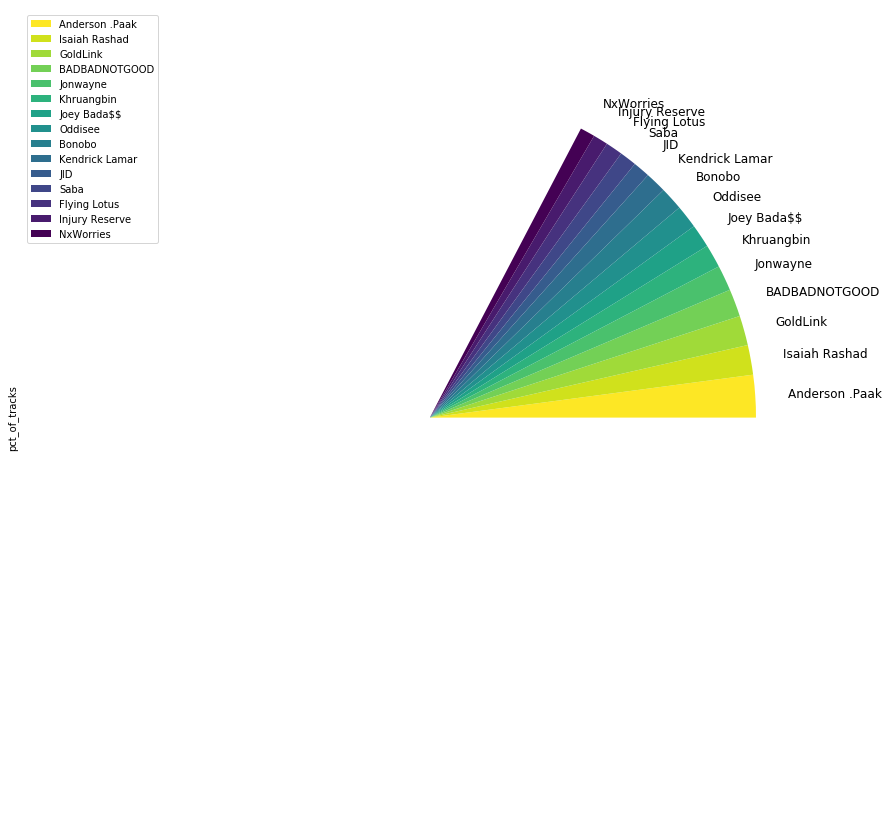

In [271]:
artist_stats.head(15).plot(kind='pie',y='pct_of_tracks',figsize=(15,15),colormap='viridis_r',fontsize=12)

Most Featured Artists

---

In [272]:
import numpy as np

In [273]:
featured_artists = df.drop_duplicates().replace('',np.nan).dropna().groupby('featured_artists').count().sort_values(by='id',ascending=False)[['id']].rename(columns={'id':'track_count'})

In [274]:
featured_artists['pct_of_tracks'] = featured_artists['track_count'] / df.count()['id']

In [275]:
featured_artists.index = pd.Index([i.replace('Joey Bada$$','Joey Bada\$\$') for i in featured_artists.index])

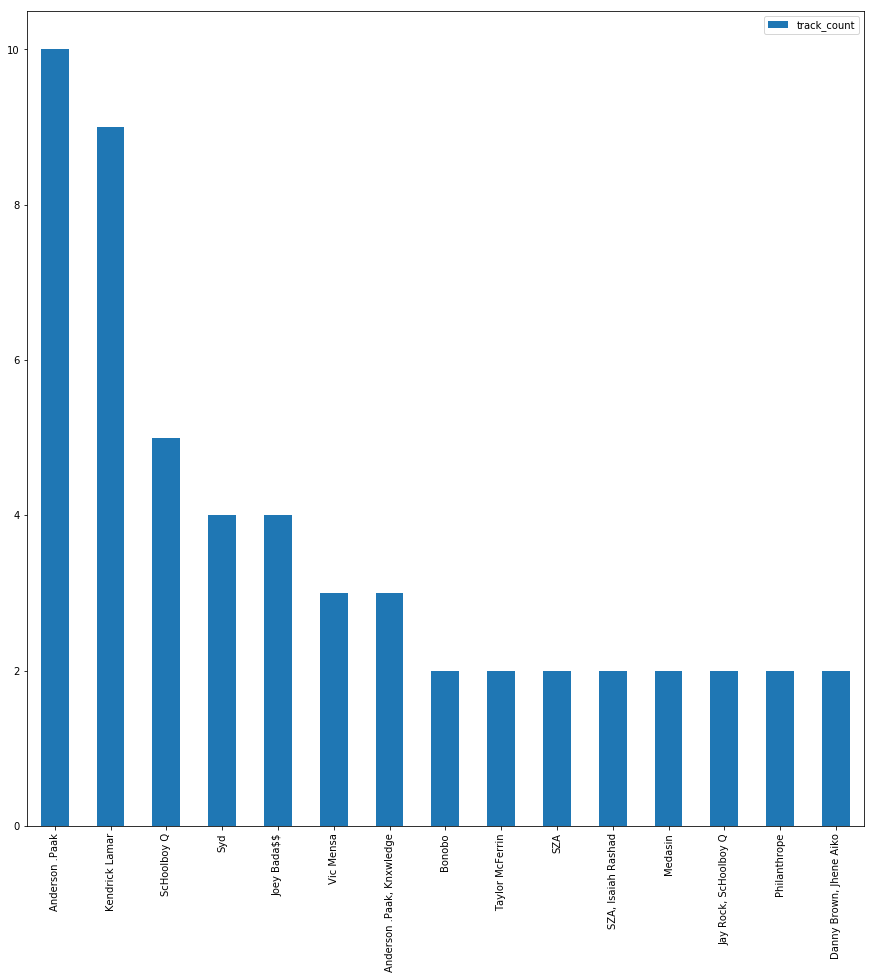

In [277]:
featured_artists.head(15).plot(kind='bar',y='track_count',figsize=(15,15),fontsize=10)